# to explore photos in a folder without labels using imutils libary

In [1]:
import tensorflow as tf
import numpy as np
import os
from imutils import paths
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
# pip install opencv-python  # import cv2
# pip install imutils
# pip install -U scikit-learn


In [3]:
# imprtant step for who not use windows as a operating system
os.getcwd()

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\tensorflow\\explore photos 2'

In [4]:
path = os.path.join(os.getcwd(),'data')

In [5]:
imagepaths = list(paths.list_images(path))
imagepaths[0]

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\tensorflow\\explore photos 2\\data\\0_img_1553496386361.jpg'

In [6]:
imagepaths[0].split('\\')

['C:',
 'Users',
 'hmohammad',
 'Desktop',
 'udacity',
 'machine_learning',
 'tensorflow',
 'explore photos 2',
 'data',
 '0_img_1553496386361.jpg']

In [7]:
# the image name is the last part
imagepaths[0].split('\\')[-1]

'0_img_1553496386361.jpg'

In [8]:
# the 1st part of the image name refer to the class name 
imagepaths[0].split('\\')[-1][0]

'0'

In [9]:
# from read me file 
class_names = ['cat', 'lynx', 'wolf', 'coyote', 'cheetah', 'jaguer', 'chimpanzee', 'orangutan', 'hamster', 'guinea pig'] 

In [10]:
class_names[3]

'coyote'

In [11]:
random.shuffle(imagepaths)

In [12]:
def data_2(path):
    '''
    to divid the data to X and y
    
    Args  
    path :  the path of the data folder 
    Retun 
    List : X_data, y_data
    '''
    X_data = []
    y_data = []
    for imagepath in path:
        image = cv2.imread(imagepath)
        X_data.append(image)
        label = int(imagepath.split('\\')[-1][0])
        y_data.append(label)
        
    return X_data, y_data    

In [13]:
X_data, y_data = data_2(imagepaths)

X_data[0].shape, X_data[2].shape

((64, 64, 3), (64, 64, 3))

In [20]:
type(X_data)

list

# note the result is list not array 

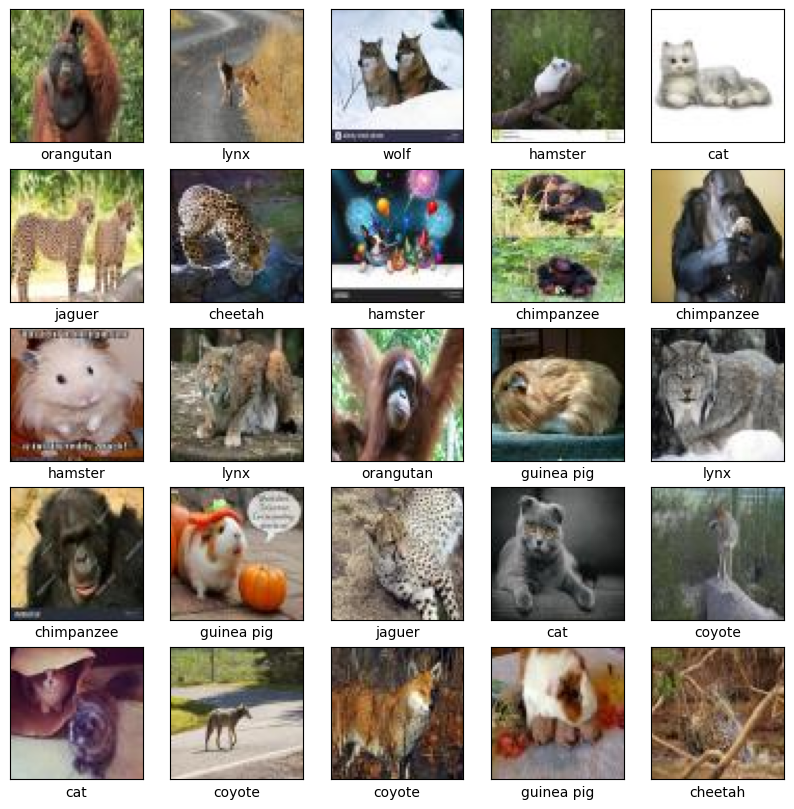

In [15]:
def show_image(x, classes, y, size):
    '''
    to show the image 
    Args
    x : X_data that got from data_2(path) function 
    classes : class_names
    y : y_data that got from data_2(path) function 
    size : the size of the shown image
    Return
    show the images 
    '''
    plt.figure(figsize = (10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        imag = cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB)
        imag = cv2.resize(imag, (size, size))
        plt.imshow(imag)
        plt.xlabel(classes[y[i]])

show_image(X_data, class_names, y_data, 64)        

In [22]:
# use sklean to split the data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .3, random_state= 42 )

In [23]:
X_train.shape , y_train.shape

AttributeError: 'list' object has no attribute 'shape'

 ## should transfer x_train and y_train  to array before use train_test_split

In [24]:
X_data = np.array(X_data) 
y_data = np.array(y_data)
X_data.shape , y_data.shape


((30, 64, 64, 3), (30,))

In [26]:
type(X_data)

numpy.ndarray

# now it is an array so could split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .3, random_state= 42 )

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 64, 64, 3), (9, 64, 64, 3), (21,), (9,))